# MushRoom Classification Complete Machine Learning Pipeline

### Writing custom log function

In [ ]:
#LOGIC

# 1. Use log() function as name
# 2. Take filename and log message
# 3. Write message in the file 
# 4. Create object of class 
# 5. open file with a+ which will write file and if not avaible it will create
# 6. Call log function

In [2]:

from datetime import datetime

class App_logger:
    def __init__(self):
        pass
    def log(self,file,message):
        #print("Writting log file ...")
        self.date=datetime.now().date()
        self.time=datetime.now().strftime("%H:%M:%S")
        #print("date and time:\t" ,str(self.date),str(self.time))
        file.write( str(self.date)+ "-" + str(self.time) + "/" + "\t\t" + message +"\n")
        #print("File log Written successfully")
        
obj=App_logger()
file=open("test_log_file.txt","a+")
obj.log(file,"this is test message")

### Wrote A json schema file that will used to validation on name of files and file data

### *Raw Data validation*

In [6]:
# As user have provided a data with batch file we have to validate it.All code in one class
#Logic 

# 1. Take path of the files as input
# 2. Read final pattern values from schema file and return it 
# 3. Create a manual regex pattern for the file name validation
# 4. Create a good and bad data directory using one function
# 5. write Function to delete good data directory
# 6. write function for delete bad data directory
# 7. Write a function to move bad data directory  files to archived folder
# 8. Validate filename function
# 9. Validate columns lenggth function
# 10. Validate missing values in whole colunbs



In [3]:
import shutil 
import os
from datetime import datetime
import re
import pandas as pd

#path=input("Enter a Path of directory :\t")
path="Training_Batch_Files/"
import json

class Raw_Data_validation:
    
    def __init__(self,path):
        self.path=path
        self.schema="schema_training.json"
        self.logger=App_logger()
        
    def valuesFromSchema(self):
        try:
            f=open(self.schema,"r")
            dic = json.load(f)
            f.close()
            pattern = dic['SampleFileName']
            LengthOfDateStampInFile = dic['LengthOfDateStampInFile']
            LengthOfTimeStampInFile = dic['LengthOfTimeStampInFile']
            column_names = dic['ColName']
            NumberofColumns = dic['NumberofColumns']
            log_file=open("Training_Logs/valuesfromSchemaValidationLog.txt","a+")
            self.logger.log(log_file,"Schema file reading successfully done")
        except Exception as e:
            #print("Error occure at schema reading")
            log_file=open("Training_Logs/valuesfromSchemaValidationLog.txt","a+")
            self.logger.log(log_file,"Schema file reading Error Occured")
        return pattern ,LengthOfDateStampInFile ,LengthOfTimeStampInFile, column_names ,NumberofColumns 
    
    def manualRegexCreation(self):
        print("Manual regex")
        regex = "['mushroom']+['\_'']+[\d_]+[\d]+\.csv"  # mushroom_08012020_120000.csv
        return regex
    
    def createDirectoryForGoodBadRawData(self):
        try:
            path = os.path.join("Training_Raw_files_validated/", "Good_Raw/")
            if not os.path.isdir(path):
                os.makedirs(path)
            path=os.path.join("Training_Raw_files_validated/","Bad_Raw/")
            if not os.path.isdir(path):
                os.makedirs(path)
            log_file=open("Training_Logs/CreateGoodBad_dir_log.txt","a+")
            #print("Successfully Created GOOD_BAD data folder")
            self.logger.log(log_file,"Successfully Created GOOD_BAD data folder")        
        except:
            #print("Error occured While creating file")
            log_file=open("Training_Logs/CreateGoodBad_dir_log.txt","a+")
            #print("Error while Creating GOOD_BAD data folder")
            self.logger.log(log_file,"Error while Creating GOOD_BAD data folder")
            
    def deleteExistingGoodDataTrainingFolder(self):
        try:
            path="Training_Raw_files_validated/Good_Raw/"
            shutil.rmtree(path)
            log_file=open("Training_Logs/DeleteGood_BAD_dir_log.txt","a+")
            #print(" Deleteing GOOD data folder successfully done")
            self.logger.log(log_file,"Deleteing GOOD data folder successfully don")
        except:
            log_file=open("Training_Logs/DeleteGood_BAD_dir_log.txt","a+")
            #print("Error while Deleteing GOOD data folder")
            self.logger.log(log_file,"Error while Deleteing GOOD data folder")
            
    def deleteExistingBadDataTrainingFolder(self):
        try:
            path="Training_Raw_files_validated/Bad_Raw/"
            shutil.rmtree(path)
            log_file=open("Training_Logs/DeleteGood_BAD_dir_log.txt","a+")
            #print(" Deleteing BAD data folder successfully done")
            self.logger.log(log_file,"Deleteing BAD data folder successfully don")
        except:
            log_file=open("Training_Logs/DeleteGood_BAD_dir_log.txt","a+")
            #print("Error while Deleteing BAD data folder")
            self.logger.log(log_file,"Error while Deleteing BAD data folder") 
            
    def moveBadFilesToArchiveBad(self):
        try:
            source="Training_Raw_files_validated/Bad_Raw/"
            dest="TrainingArchiveBadData/"
            if not os.path.isdir(dest):
                os.makedirs(dest)
            for file in os.listdir(source):
                shutil.move(source+file, dest)
            log_file=open("Training_Logs/DeleteGood_BAD_dir_log.txt","a+")
            #print("Moving to Archived Data successfull ")
            self.logger.log(log_file,"Moving to Archived Data successfull")    
        except:
            log_file=open("Training_Logs/DeleteGood_BAD_dir_log.txt","a+")
            #print(" Moving data to archive successfully done")
            self.logger.log(log_file,"Moving data to archive successfully done")
            
    def validationFileNameRaw(self,regex,LengthOfDateStampInFile,LengthOfTimeStampInFile):
        self.deleteExistingGoodDataTrainingFolder()
        self.deleteExistingBadDataTrainingFolder()
        log_file = open("Training_Logs/nameValidationLog.txt", 'a+')
        try:
            self.createDirectoryForGoodBadRawData()
            for filename in os.listdir(self.path):
                #print(filename)
                if re.match(regex,filename):
                    splitDot=re.split(".csv",filename)
                    splitDot=re.split("_",splitDot[0])
                    if len(splitDot[1]) == LengthOfDateStampInFile :
                        if len(splitDot[2]) == LengthOfTimeStampInFile :
                            shutil.copyfile("Training_Batch_Files/"+filename, "Training_Raw_files_validated/Good_Raw/"+filename) 
                            self.logger.log(log_file,"Valid File name!! File moved to GoodRaw Folder ")
                        else:
                            shutil.copyfile("Training_Batch_Files/" + filename, "Training_Raw_files_validated/Bad_Raw/"+filename)
                            self.logger.log(log_file,"Invalid File name!! File moved to GoodRaw Folder ")
                    else:
                        shutil.copyfile("Training_Batch_Files/" + filename, "Training_Raw_files_validated/Bad_Raw/"+filename)
                        self.logger.log(log_file,"Invalid File name!! File moved to GoodRaw Folder ")
                else:
                    shutil.copyfile("Training_Batch_Files/" + filename, "Training_Raw_files_validated/Bad_Raw/"+filename)
                    self.logger.log(log_file,"Invalid File name!! File moved to GoodRaw Folder ")
            log_file.close()                
        except:
            #print("Error in Validaation of filename")
            self.logger.log(log_file,"Error in Validaation of filename")
            log_file.close()
            
    def validateColumnLength(self,NumberofColumns):
        log_file = open("Training_Logs/columnValidationLog.txt", 'a+')
        try:
            for file in os.listdir("Training_Raw_files_validated/Good_Raw/"):
                csv=pd.read_csv("Training_Raw_files_validated/Good_Raw/"+file)
                if csv.shape[1]==NumberofColumns:
                    pass
                else:
                    shutil.move("Training_Raw_files_validated/Good_Raw/"+file,"Training_Raw_files_validated/Bad_Raw")
                #print("Number of columns validation done successfully.")
                self.logger.log(log_file,"Number of columns validation done successfully.")    
        except:
            self.logger.log(log_file,"Error in Number of column validation.")
            print("Error in Number of column validation.")
            log_file.close()
            
    def validateMissingValuesInWholeColumn(self):
        log_file = open("Training_Logs/validateMissingValuesInWholeColumn.txt", 'a+')
        try:
            #iterate over each file
            for file in os.listdir("Training_Raw_files_validated/Good_Raw/"):
                #iterate over each file column
                csv=pd.read_csv("Training_Raw_files_validated/Good_Raw/"+file)
                for columns in csv:
                    if ( len(csv[columns]) - csv[columns].count() == len(csv[columns]) ) :
                        shutil.move("Training_Raw_files_validated/Good_Raw/"+file,"Training_Raw_files_validated/Bad_Raw")
                        
                        self.logger.log(log_file,"validateMissingValuesInWholeColumn moved file to bad_raw folder")
                    else:
                        pass
            #print("validateMissingValuesInWholeColumn Done successfully")        
            self.logger.log(log_file,"validateMissingValuesInWholeColumn Done successfully")        
            log_file.close()            
        except:
            #print("Error while validateMissingValuesInWholeColumn ")
            self.logger.log(log_file,"validateMissingValuesInWholeColumn occured Error")        
            log_file.close() 
        
                   
obj=Raw_Data_validation(path)
obj.createDirectoryForGoodBadRawData()
#obj.deleteExistingGoodDataTrainingFolder()
#obj.deleteExistingBadDataTrainingFolder()
regex=obj.manualRegexCreation()
pattern ,LengthOfDateStampInFile ,LengthOfTimeStampInFile, column_names ,NumberofColumns=obj.valuesFromSchema()
obj.validationFileNameRaw(regex,LengthOfDateStampInFile ,LengthOfTimeStampInFile )
obj.validateColumnLength(NumberofColumns)
obj.validateMissingValuesInWholeColumn()
obj.moveBadFilesToArchiveBad()

Manual regex


### Data Transformation

In [8]:
import pandas as pd 
 
class DataTranform:
    def __init__(self):
        self.goodDataPath="Training_Raw_files_validated/Good_Raw/"
        self.logger=App_logger()
    def addQuotesToStringValuesInColumn(self):
        log_file = open("Training_Logs/DataTranform_log.txt", 'a+')
        onlyfiles = [f for f in os.listdir("Training_Raw_files_validated/Good_Raw/")]
        try:
            for file in onlyfiles:
                data=pd.read_csv("Training_Raw_files_validated/Good_Raw/"+file)
                for column in data.columns:
                    count = data[column][data[column] == '?'].count()
                    if count != 0:
                        #data[column] = data[column].replace('?', "'?'")
                        data[column] = data[column].apply(lambda x: "'?'" if x == '?' else x)
                        data.to_csv("Training_Raw_files_validated/Good_Raw/"+file,index=False)
            print("Data tranformation addQuotesToStringValuesInColumn successful")    
            self.logger.log(log_file,"Data tranformation addQuotesToStringValuesInColumn successful")
            log_file.close()
        except:
            print("Error Occured at  addQuotesToStringValuesInColumn ")
            self.logger.log(log_file,"Data tranformation addQuotesToStringValuesInColumn Error occured")
            log_file.close()    
            
        
obj= DataTranform()
obj.addQuotesToStringValuesInColumn()


Data tranformation addQuotesToStringValuesInColumn successful


### Data Base Operation

In [9]:
import sqlite3
import csv
class dBOperation:
    def __init__(self):
        self.path="Training_Database/"
        self.badFilePath="Training_Raw_files_validated/Bad_Raw"
        self.goodFilePath="Training_Raw_files_validated/Good_Raw"
        self.logger = App_logger()
        
    def dataBaseConnection(self,DatabaseName):
        conn=None
        log_file = open("Training_Logs/DataBaseConnectionLog.txt", 'a+')
        try:
            path="Training_Database/"
            if not os.path.isdir(path):
                os.makedirs(path)
            conn = sqlite3.connect(self.path+DatabaseName+'.db')
            self.logger.log(log_file, "Database connection Done successfully")
            print("Database connection Done successfully")
            log_file.close()
        except :
            print("Error in DB connection")
            self.logger.log(log_file, "Error in DB connection")
            log_file.close()
        return conn
    def createTableDb(self,DatabaseName,column_names):
        try:
            conn=self.dataBaseConnection(DatabaseName)
            log_file = open("Training_Logs/DataBaseConnectionLog.txt", 'a+')
            c=conn.cursor()
            c.execute("SELECT count(name)  FROM sqlite_master WHERE type = 'table' AND name = 'Good_Raw_Data'")
            if c.fetchone()[0] ==1:
                conn.close()
                print("Table already exist")
                #print("Table created successfully")
                self.logger.log(log_file, "Table created in DB Done successfully")
                log_file.close()
            else:
                for key in column_names.keys():
                    type = column_names[key]
                    
                    try:
                        conn.execute('ALTER TABLE Good_Raw_Data ADD COLUMN "{column_name}" {dataType}'.format(column_name=key,dataType=type))
                    except:
                        conn.execute('CREATE TABLE  Good_Raw_Data ({column_name} {dataType})'.format(column_name=key, dataType=type))
                conn.close()

                self.logger.log(log_file, "Tables created successfully!!")
                print("Table created successfully")
                log_file.close()
        except:
            conn.close()
            self.logger.log(log_file, "Error while creating table ")
            print("Error while creating table ")
            file.close()
            
    def insertIntoTableGoodData(self,Database):
        conn = self.dataBaseConnection(Database)
        #print(conn)
        goodFilePath= self.goodFilePath
        #print(goodFilePath)
        badFilePath = self.badFilePath
        #print(badFilePath)
        onlyfiles = [f for f in os.listdir(goodFilePath)]
        #print(onlyfiles)
        log_file = open("Training_Logs/DbInsertLog.txt", 'a+')
        count=0
        for file in onlyfiles:
            print(file+"\t"+str(count))
            count+=1
            try: 
                f=open(goodFilePath+'/'+file, "r")
                next(f)
                reader = csv.reader(f, delimiter="\n")
                for line in enumerate(reader):
                    for list_ in (line[1]):
                        try:
                            conn.execute('INSERT INTO Good_Raw_Data values ({values})'.format(values=(list_)))
                            self.logger.log(log_file," %s: File loaded successfully!!" % file)
                            conn.commit()
                        except Exception as e:
                            print(e)
            
            except Exception as e:
                conn.rollback()
                print("Error while creating table")
                self.logger.log(log_file,"Error while creating table: %s " % e)
                shutil.move(goodFilePath+'/' + file, badFilePath)
                self.logger.log(log_file, "File Moved Successfully %s" % file)
    def selectingDatafromtableintocsv(self,Database):
        self.fileFromDb = 'Training_FileFromDB/'
        self.fileName = 'InputFile.csv'
        log_file = open("Training_Logs/ExportToCsv.txt", 'a+')
        try:
            conn = self.dataBaseConnection(Database)
            sqlSelect = "SELECT *  FROM Good_Raw_Data"
            cursor = conn.cursor()

            cursor.execute(sqlSelect)

            results = cursor.fetchall()
            # Get the headers of the csv file
            headers = [i[0] for i in cursor.description]

            #Make the CSV ouput directory
            if not os.path.isdir(self.fileFromDb):
                os.makedirs(self.fileFromDb)

            # Open CSV file for writing.
            csvFile = csv.writer(open(self.fileFromDb + self.fileName, 'w', newline=''),delimiter=',', lineterminator='\r\n',quoting=csv.QUOTE_ALL, escapechar='\\')

            # Add the headers and data to the CSV file.
            csvFile.writerow(headers)
            csvFile.writerows(results)

            self.logger.log(log_file, "File exported successfully!!!")
            log_file.close()

        except Exception as e:
            self.logger.log(log_file, "File exporting failed. Error : %s" %e)
            log_file.close()



            
          
obj=dBOperation()            
obj.dataBaseConnection("Training")
obj.createTableDb("Training",column_names)
obj.insertIntoTableGoodData("Training")
obj.selectingDatafromtableintocsv("Training")

Database connection Done successfully
Database connection Done successfully
Table created successfully
Database connection Done successfully
mushroom_08012012_120016.csv	0
mushroom_08012018_120022.csv	1
mushroom_08012011_120015.csv	2
mushroom_08012013_120017.csv	3
mushroom_08012009_120013.csv	4
mushroom_08012015_120019.csv	5
mushroom_08012016_120020.csv	6
mushroom_08012010_120014.csv	7
mushroom_08012006_120010.csv	8
mushroom_08012017_120021.csv	9
mushroom_08012008_120012.csv	10
mushroom_08012014_120018.csv	11
mushroom_08012007_120011.csv	12
Database connection Done successfully


In [4]:
import pandas as pd
class Data_Getter:
    def __init__(self):
        self.logger=App_logger()
        self.train_file='Training_FileFromDB/InputFile.csv'
        
    def get_data(self):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        self.logger.log(log_file,"Reading the train csv file started..")
        try:
            self.data=pd.read_csv(self.train_file)
            self.logger.log(log_file,"Successfully Read the train csv.")
            log_file.close()
            return self.data
        except Exception as e:
            self.logger.log(log_file,"Error occeured while reading train csv file"+str(e))
            log_file.close()
            raise Exception()
obj=Data_Getter()
data=obj.get_data()

In [5]:
print(data.shape)
print(data.columns)

(8124, 23)
Index(['capshape', 'capsurface', 'capcolor', 'bruises%3F', 'odor',
       'gillattachment', 'gillspacing', 'gillsize', 'gillcolor', 'stalkshape',
       'stalkroot', 'stalksurfaceabovering', 'stalksurfacebelowring',
       'stalkcolorabovering', 'stalkcolorbelowring', 'veiltype', 'veilcolor',
       'ringnumber', 'ringtype', 'sporeprintcolor', 'population', 'habitat',
       'class'],
      dtype='object')


In [6]:
import numpy as np
import os
#from autoimpute.imputations import SingleImputer

class Preprocessor:
    def __init__(self):
        self.logger=App_logger()
    
    def dropUnnecessaryColumns(self,data,columnNameList):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        data = data.drop(columnNameList,axis=1)
        self.logger.log(log_file, 'Drop unnecessary columns compledted')
        return data
    
    def replaceInvalidValuesWithNull(self,data):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        for column in data.columns:
            count = data[column][data[column] == '?'].count()
            if count != 0:
                data[column] = data[column].replace('?', np.nan)
        self.logger.log(log_file, 'Replacing "?" with nan complted')        
        return data
    
    def encodeCategoricalValues(self,data):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        data["class"] = data["class"].map({'p': 1, 'e': 2})
        for column in data.drop(['class'],axis=1).columns:
            print(column)
            data= pd.get_dummies(data, columns=[column])
        self.logger.log(log_file, 'Encoding categorial data completed')    
        return data
    
    def separate_label_feature(self, data, label_column_name):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        self.logger.log(log_file, 'Entered the separate_label_feature method of the Preprocessor class')
        try:
            self.X=data.drop(labels=label_column_name,axis=1) # drop the columns specified and separate the feature columns
            self.Y=data[label_column_name] # Filter the Label columns
            self.logger.log(log_file,'Label Separation Successful. Exited the separate_label_feature method of the Preprocessor class')
            return self.X,self.Y
        except Exception as e:
            self.logger.log(log_file,'Exception occured in separate_label_feature method of the Preprocessor class. Exception message:  ' + str(e))
            self.logger.log(log_file, 'Label Separation Unsuccessful. Exited the separate_label_feature method of the Preprocessor class')
            raise Exception()
    
    def is_null_present(self,data):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        self.logger.log(log_file, 'Entered the is_null_present method of the Preprocessor class')
        self.null_present = False
        self.cols_with_missing_values=[]
        self.cols = data.columns
        try:
            null=data.isna().sum()
            for i in range(len(null)):
                if null[i]>0:
                    self.null_present = True
                    self.cols_with_missing_values.append(self.cols[i])
            if self.null_present == True:
                df=pd.DataFrame({'columns':data.columns ,"Missing":np.asarray(data.isna().sum())})
                path="preprocessing_data/"
                if not os.path.isdir(path):
                    os.makedirs(path)
                df.to_csv('preprocessing_data/null_values.csv')
                self.logger.log(log_file, 'Successfully checked for null values')
            return self.null_present , self.cols_with_missing_values   
        except:
            self.logger.log(log_file, 'Error while check for null values')
    
    def impute_missing_values(self,data, cols_with_missing_values):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        self.data=data
        self.cols_with_missing_values=cols_with_missing_values
        try:
            for column in (self.cols_with_missing_values):
                self.data[column].fillna(self.data[column].mode()[0], inplace=True)
            self.logger.log(log_file, 'Missing values imputer done...')
            return self.data
        except:
            self.logger.log(log_file, 'Error Missing values imputer done')
        
        
    def remove_columns(self,data,columns):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        self.loggger.log(log_file,"Entered to Remove  Columns ...")
        self.data=data
        self.columns=columns
        try:
            self.data=self.data.drop(labels=self.columns,axis=1)
            self.loggger.log(log_file,"Columns Removed Done successfully..")
            return self.useful_data
        except Exception as e:
            self.logger.log(log_file,"Error occeured While reomving columns"+str(e))
            raise Exception()
            
    
obj1=Preprocessor()
data=obj1.dropUnnecessaryColumns(data,['veiltype'])
print(data.shape)
obj1.replaceInvalidValuesWithNull(data)
is_null_present,cols_with_missing_values=obj1.is_null_present(data)
is_null_present,cols_with_missing_values

(8124, 22)


(True, ['stalkroot'])

In [7]:
data.isna().sum()

capshape                    0
capsurface                  0
capcolor                    0
bruises%3F                  0
odor                        0
gillattachment              0
gillspacing                 0
gillsize                    0
gillcolor                   0
stalkshape                  0
stalkroot                2480
stalksurfaceabovering       0
stalksurfacebelowring       0
stalkcolorabovering         0
stalkcolorbelowring         0
veilcolor                   0
ringnumber                  0
ringtype                    0
sporeprintcolor             0
population                  0
habitat                     0
class                       0
dtype: int64

In [8]:
if (is_null_present)==True:
    data=obj1.impute_missing_values(data,cols_with_missing_values) 

In [9]:
data.isna().sum()

capshape                 0
capsurface               0
capcolor                 0
bruises%3F               0
odor                     0
gillattachment           0
gillspacing              0
gillsize                 0
gillcolor                0
stalkshape               0
stalkroot                0
stalksurfaceabovering    0
stalksurfacebelowring    0
stalkcolorabovering      0
stalkcolorbelowring      0
veilcolor                0
ringnumber               0
ringtype                 0
sporeprintcolor          0
population               0
habitat                  0
class                    0
dtype: int64

In [10]:
#import os
#import seaborn as sns
#path="CountPlot_Train_Data/"
#if not os.path.isdir(path):
#    os.makedirs(path)
#    
#for col in data.columns:
#    print(col)
#    sns_plot=sns.countplot(data[col])
#    sns_plot.figure.savefig("CountPlot_Train_Data/"+col+".png")


In [11]:
data=obj1.encodeCategoricalValues(data)

capshape
capsurface
capcolor
bruises%3F
odor
gillattachment
gillspacing
gillsize
gillcolor
stalkshape
stalkroot
stalksurfaceabovering
stalksurfacebelowring
stalkcolorabovering
stalkcolorbelowring
veilcolor
ringnumber
ringtype
sporeprintcolor
population
habitat


In [12]:
X,Y=obj1.separate_label_feature(data, "class")

In [13]:
#dataframe=X.copy()

In [14]:
X

capshape_b  capshape_c  capshape_f  capshape_k  capshape_s  capshape_x  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           1           0           0           0   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
8119           0           0           0           0           0           1   
8120           0           0           1           0           0           0   
8121           0           0           0           0           0           1   
8122           0           0           1           0           0           0   
8123           0           0           1           0           0           0   

      capsurface_f  capsurface_g  capsurface_s  capsurface_y  ...  \
0                1             0             0             0  ...   
1                1             0             0             0  ...   
2                1             0             0             0  ...   
3                0             0             1             0  ...   
4                1             0             0             0  ...   
...            ...           ...           ...           ...  ...   
8119             1             0             0             0  ...   
8120             0             0             1             0  ...   
8121             0             0             1             0  ...   
8122             1             0             0             0  ...   
8123             1             0             0             0  ...   

      population_s  population_v  population_y  habitat_d  habitat_g  \
0                0             1             0          0          0   
1                0             1             0          1          0   
2                0             1             0          1          0   
3                1             0             0          1          0   
4                0             1             0          1          0   
...            ...           ...           ...        ...        ...   
8119             0             0             0          0          1   
8120             0             0             0          0          1   
8121             0             0             0          0          1   
8122             0             0             0          0          1   
8123             0             0             0          0          1   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0             0          0          1          0          0  
1             0          0          0          0          0  
2             0          0          0          0          0  
3             0          0          0          0          0  
4             0          0          0          0          0  
...         ...        ...        ...        ...        ...  
8119          0          0          0          0          0  
8120          0          0          0          0          0  
8121          0          0          0          0          0  
8122          0          0          0          0          0  
8123          0          0          0          0          0  

[8124 rows x 115 columns]

### File operation to save model and load model after taringing and while testing respectively

In [15]:
import pickle
import os
import shutil


In [16]:
class File_Operation:
    def __init__(self):
        self.logger=App_logger()
        self.model_directory='models/'
        
    def save_model(self,model,filename):
        print("In saved model")
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        self.logger.log(log_file,"Entered to save model process")
        try:
            path = os.path.join(self.model_directory,filename)
            if not os.path.isdir(path):
                os.makedirs(path)
            else:
                shutil.rmtree(self.model_directory)
                os.makedirs(path) 
            with open(path +'/' + filename+'.sav','wb') as f:
                pickle.dump(model, f)
            self.logger.log(log_file,"Saved model to local system")    
                
        except Exception as e:
            self.logger.log(log_file,"Error in Saving model to local system")
            raise Exception()
            
    def load_model(self,filename):
        log_file=open("Prediction_Logs/ModelPredictionLog.txt", 'a+')
        self.logger.log(log_file, 'Entered the load_model method of the File_Operation class')
        try:
            with open(self.model_directory + filename + '/' + filename + '.sav', 'rb') as f:
                self.logger.log(log_file,'Model File ' + filename + ' loaded. Exited the load_model method of the Model_Finder class')
                return pickle.load(f)
        except Exception as e:
            self.logger.log(log_file,'Exception occured in load_model ' + str(e))
            self.logger.log(log_file,'Model File ' + filename + ' could not be saved. Exited the load_model method of the Model_Finder class')
            raise Exception()
     
    def find_correct_model_file(self,cluster_number):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        self.logger.log(log_file, 'Entered the find_correct_model_file method of the File_Operation class')
        try:
            self.cluster_number= cluster_number

            self.folder_name=self.model_directory

            self.list_of_model_files = []
            self.list_of_files = os.listdir(self.folder_name)
            for self.file in self.list_of_files:
                try:
                    if (self.file.index(str( self.cluster_number))!=-1):
                        self.model_name=self.file
                except:
                    continue
                   
            self.model_name=self.model_name.split('.')[0]
            self.logger.log(log_file,'Exited the find_correct_model_file method of the Model_Finder class.')
            return self.model_name
        
        except Exception as e:
            self.logger.log(log_file,'Exception occured in find_correct_model_file method   ' + str(e))
            self.logger.log(log_file,'Exited the find_correct_model_file method of the Model_Finder class with Failure')
            raise Exception()
    

### Applying a clustering approach

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [18]:
#!pip install kneed

[90241.47710487423, 76233.68560323202, 65709.38613815125, 58349.244349232424, 52838.16762959823, 49560.746945085455, 47391.83650446428, 45270.00417523679, 43159.75868319849, 42287.73693531687]
<class 'numpy.ndarray'>
In saved model


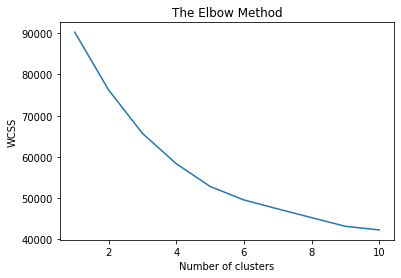

In [19]:
class KMeansClustering:
    def __init__(self):
        self.logger=App_logger()
    def elbow_plot(self,data):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        self.logger.log(log_file,"Entered to Elbow_plot process")
        wcss=[]
        try:
            for i in range(1,11):
                kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) 
                kmeans.fit(data)
                wcss.append(kmeans.inertia_)
            print(wcss)    
            plt.plot(range(1,11),wcss)
            plt.title('The Elbow Method')
            plt.xlabel('Number of clusters')
            plt.ylabel('WCSS')
            plt.savefig('preprocessing_data/K-Means_Elbow.PNG')
            self.kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
            self.logger.log(log_file,"Elobow plot successfully created ")
            log_file.close()
            return self.kn.knee
        except Exception as e:
            self.logger.log(log_file,"Erro in Elobow plot ")
            raise Exception()
    def create_clusters(self,data,number_of_clusters):
        self.data=data
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        self.logger.log(log_file,"Entered to Create Clusters process ...")
        try:
            self.kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
            self.y_kmeans=self.kmeans.fit_predict(self.data)
            print(type(self.y_kmeans))
            self.file_op=File_Operation()
            self.save_model = self.file_op.save_model(self.kmeans, 'KMeans')
            self.data['Cluster']=list(self.y_kmeans)
            self.logger.log(log_file, 'succesfully created '+str(self.kn.knee)+ 'clusters. Exited the create_clusters method of the KMeansClustering class')
            return self.data ,self.y_kmeans
        except Exception as e:
            raise Exception()
            print("Error")
            self.logger.log(log_file,"Error in create cluster")
               
obj2=KMeansClustering ()           
num_of_clusters=obj2.elbow_plot(X)             
X=obj2.create_clusters(X,num_of_clusters)

In [20]:
X=X[0]

In [21]:
X["Labels"]=Y

In [22]:
X

capshape_b  capshape_c  capshape_f  capshape_k  capshape_s  capshape_x  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           1           0           0           0   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
8119           0           0           0           0           0           1   
8120           0           0           1           0           0           0   
8121           0           0           0           0           0           1   
8122           0           0           1           0           0           0   
8123           0           0           1           0           0           0   

      capsurface_f  capsurface_g  capsurface_s  capsurface_y  ...  \
0                1             0             0             0  ...   
1                1             0             0             0  ...   
2                1             0             0             0  ...   
3                0             0             1             0  ...   
4                1             0             0             0  ...   
...            ...           ...           ...           ...  ...   
8119             1             0             0             0  ...   
8120             0             0             1             0  ...   
8121             0             0             1             0  ...   
8122             1             0             0             0  ...   
8123             1             0             0             0  ...   

      population_y  habitat_d  habitat_g  habitat_l  habitat_m  habitat_p  \
0                0          0          0          0          0          1   
1                0          1          0          0          0          0   
2                0          1          0          0          0          0   
3                0          1          0          0          0          0   
4                0          1          0          0          0          0   
...            ...        ...        ...        ...        ...        ...   
8119             0          0          1          0          0          0   
8120             0          0          1          0          0          0   
8121             0          0          1          0          0          0   
8122             0          0          1          0          0          0   
8123             0          0          1          0          0          0   

      habitat_u  habitat_w  Cluster  Labels  
0             0          0        2       1  
1             0          0        4       1  
2             0          0        1       2  
3             0          0        4       1  
4             0          0        4       1  
...         ...        ...      ...     ...  
8119          0          0        3       2  
8120          0          0        3       2  
8121          0          0        3       2  
8122          0          0        3       2  
8123          0          0        3       2  

[8124 rows x 117 columns]

In [23]:
#data=X.copy()

In [24]:
list_of_clusters=X['Cluster'].unique()
list_of_clusters

array([2, 4, 1, 0, 3])

class  capshape_b  capshape_c  capshape_f  capshape_k  capshape_s  \
0         1           0           0           0           0           0   
1         1           0           0           0           0           0   
2         2           0           0           1           0           0   
3         1           0           0           0           0           0   
4         1           0           0           0           0           0   
...     ...         ...         ...         ...         ...         ...   
8119      2           0           0           0           0           0   
8120      2           0           0           1           0           0   
8121      2           0           0           0           0           0   
8122      2           0           0           1           0           0   
8123      2           0           0           1           0           0   

      capshape_x  capsurface_f  capsurface_g  capsurface_s  ...  population_s  \
0              1             1             0             0  ...             0   
1              1             1             0             0  ...             0   
2              0             1             0             0  ...             0   
3              1             0             0             1  ...             1   
4              1             1             0             0  ...             0   
...          ...           ...           ...           ...  ...           ...   
8119           1             1             0             0  ...             0   
8120           0             0             0             1  ...             0   
8121           1             0             0             1  ...             0   
8122           0             1             0             0  ...             0   
8123           0             1             0             0  ...             0   

      population_v  population_y  habitat_d  habitat_g  habitat_l  habitat_m  \
0                1             0          0          0          0          0   
1                1             0          1          0          0          0   
2                1             0          1          0          0          0   
3                0             0          1          0          0          0   
4                1             0          1          0          0          0   
...            ...           ...        ...        ...        ...        ...   
8119             0             0          0          1          0          0   
8120             0             0          0          1          0          0   
8121             0             0          0          1          0          0   
8122             0             0          0          1          0          0   
8123             0             0          0          1          0          0   

      habitat_p  habitat_u  habitat_w  
0             1          0          0  
1             0          0          0  
2             0          0          0  
3             0          0          0  
4             0          0          0  
...         ...        ...        ...  
8119          0          0          0  
8120          0          0          0  
8121          0          0          0  
8122          0          0          0  
8123          0          0          0  

[8124 rows x 116 columns]

## Model finder

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [27]:
class Model_Finder:
    def __init__(self):
        self.logger=App_logger()
        self.clf = RandomForestClassifier()
        self.knn=KNeighborsClassifier()
    
    def get_best_params_for_random_forest(self,train_x,train_y):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        self.logger.log(log_file, 'Entered the get_best_params_for_random_forest method of the Model_Finder class')
        try:
            # initializing with different combination of parameters
            self.param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 4, 1), "max_features": ['auto', 'log2']}

            #Creating an object of the Grid Search class
            self.grid = GridSearchCV(estimator=self.clf, param_grid=self.param_grid, cv=5,  verbose=3)
            #finding the best parameters
            self.grid.fit(train_x, train_y)

            #extracting the best parameters
            self.criterion = self.grid.best_params_['criterion']
            self.max_depth = self.grid.best_params_['max_depth']
            self.max_features = self.grid.best_params_['max_features']
            self.n_estimators = self.grid.best_params_['n_estimators']

            #creating a new model with the best parameters
            self.clf = RandomForestClassifier(n_estimators=self.n_estimators, criterion=self.criterion,
                                              max_depth=self.max_depth, max_features=self.max_features)
            # training the mew model
            self.clf.fit(train_x, train_y)
            self.logger.log(log_file,'Random Forest best params: '+str(self.grid.best_params_)+'. Exited the get_best_params_for_random_forest method of the Model_Finder class')
            return self.clf
        except Exception as e:
            self.logger.log(log_file,'Exception occured in get_best_params_for_random_forest method of the Model_Finder class. Exception message:  ' + str( e))
            raise Exception()
            
    def get_best_params_for_KNN(self, train_x, train_y):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        self.logger.log(log_file,"Entered to Best params for KNN")

        try:
            self.param_grid_knn = {
                'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
                'leaf_size' : [10,17,24,28,30,35],
                'n_neighbors':[4,5,8,10,11],
                'p':[1,2]
                }

            # Creating an object of the Grid Search class
            self.grid = GridSearchCV(self.knn, self.param_grid_knn, verbose=3, cv=5)
            # finding the best parameters
            self.grid.fit(train_x, train_y)
            
            # extracting the best parameters
            self.algorithm = self.grid.best_params_['algorithm']
            self.leaf_size = self.grid.best_params_['leaf_size']
            self.n_neighbors = self.grid.best_params_['n_neighbors']
            self.p  = self.grid.best_params_['p']

            # creating a new model with the best parameters
            self.knn = KNeighborsClassifier(algorithm=self.algorithm, leaf_size=self.leaf_size, n_neighbors=self.n_neighbors,p=self.p,n_jobs=-1)
            # training the mew model
            self.knn.fit(train_x, train_y)
            self.logger.log(log_file,'KNN best params: ' + str(self.grid.best_params_) + '. Exited the KNN method of the Model_Finder class')
            print("Knn best parameter get completed ",)
            return self.knn
        except Exception as e:
            self.logger.log(log_file, 'Exception occured in knn method of the Model_Finder class. Exception message:' + str(e))
            raise Exception()
            
    def get_best_model(self,train_x,train_y,test_x,test_y):
        log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')
        self.logger.log(log_file,"Entered to Get best model Process ")
        try:
            self.knn= self.get_best_params_for_KNN(train_x,train_y)
            self.prediction_knn = self.knn.predict(test_x)
            if len(test_y.unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
                self.knn_score = accuracy_score(test_y, self.prediction_knn)
                print("Knn Unique",self.knn_score)
                self.logger.log(log_file, 'Accuracy for knn:' + str(self.knn_score)) 
            else:
                self.knn_score = roc_auc_score(test_y, self.prediction_knn) # AUC for KNN
                print("KNN AUC score",self.knn_score)
                self.knn_confusion=confusion_matrix(test_y, self.prediction_knn)
                print("KNN confusion matrix", self.knn_confusion)
                self.logger.log(log_file, 'AUC for knn:' + str(self.knn_score)) # Log AUC 
                self.logger.log(log_file,'Confusion matrix for knn' + str(self.knn_confusion))
                
            # create best model for Random Forest
            self.random_forest=self.get_best_params_for_random_forest(train_x,train_y)
            self.prediction_random_forest=self.random_forest.predict(test_x) # prediction using the Random Forest Algorithm

            if len(test_y.unique()) == 1:#if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
                self.random_forest_score = accuracy_score((test_y),self.prediction_random_forest)
                print("Unique random forest", self.random_forest_score )
                self.logger.log(log_file, 'Accuracy for RF:' + str(self.random_forest_score))
            else:
                self.Random_confusion=confusion_matrix(test_y, self.prediction_random_forest)
                print("Random forest confusion",self.Random_confusion)
                self.random_forest_score = roc_auc_score(test_y, self.prediction_random_forest) # AUC for Random Forest
                print("Random forest AUC", self.random_forest_score )
                self.logger.log(log_file, 'AUC for RF:' + str(self.random_forest_score)) 
                self.logger.log(log_file, 'Confusion matrix for Random forest' + str(self.Random_confusion)) 
                
            print("random_forest_score ",self.random_forest_score ) 
            print(" knn_score", self.knn_score)
            #comparing the two models
            if(self.random_forest_score <  self.knn_score):
                return 'KNN',self.knn
            else:
                return 'RandomForest',self.random_forest    
                
        except Exception as e:
            self.logger.log(log_file,'Exception occured in get_best_model method of the Model_Finder class. Exception message: ' + str(e))
        
            

In [28]:
logger=App_logger()
log_file=open("Training_Logs/ModelTrainingLog.txt", 'a+')


In [29]:

for i  in list_of_clusters:
    cluster_data=X[X['Cluster']==i] 
    cluster_features=cluster_data.drop(['Cluster','Labels'],axis=1)
    cluster_label= cluster_data['Labels']
    train_x, test_x,train_y, test_y = train_test_split(cluster_features, cluster_label, test_size=1 / 3, random_state=36)
    model_finder=Model_Finder()
    best_model_name,best_model=model_finder.get_best_model(train_x,train_y,test_x,test_y)
    print(best_model_name,best_model)
    file_op = File_Operation()
    save_model=file_op.save_model(best_model,best_model_name+str(i))
    logger.log(log_file,"Model saved"+str(i))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_nei

[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_nei

[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_nei

[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_nei

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_nei

[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=35, n_ne

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10

[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p

[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=2, score=1.000, 

[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=8, p=1, score=1.000, 

[CV]  algorithm=brute, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=10, p=1, score=1.000

[CV]  algorithm=brute, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=10, p=2 ..............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=10, p=2 ..............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=10, p=2 ..............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=10, p=2 ..............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=10, p=2 ..............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=11, p=1, score=

[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=2, score=

[CV]  algorithm=brute, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
Knn best parameter get completed 


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   35.3s finished


Knn Unique 1.0
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=1.000, total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=auto, n_e

[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=1.000, total=   0.4s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.5s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.4s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=log2

[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=entropy, max

[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   23.7s finished


RandomForestClassifier(max_depth=2, n_estimators=10)
In saved model
Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.997, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.997, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_nei

[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2, score=0.997, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_nei

[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=4, p=2, score=0.997, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_nei

[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1, score=0.997, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_nei

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=1, score=0.997, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_nei

[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, score=0.997, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_nei

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, score=1.000, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, score=0.997, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, score=1.000, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1, score=1.000, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1, score=1.000, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1, score=1.000, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1,

[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=1, score=0.997, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2,

[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1, score=1.000, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2, score=0.997, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=1

[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=2, score=1.000, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=2, score=0.997, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=10, 

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1, score=0.994, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=0.994, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=1.000, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=1

[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=2, score=0.991, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=2 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, score=0.994, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, score=0.997, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, score=0.988, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, score=

[CV]  algorithm=brute, leaf_size=17, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=17, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=11, p=2, score=0.994, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=11, p=2, score=0.997, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=11, p=2, score=0.988, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=4, p=1, score=1

[CV]  algorithm=brute, leaf_size=28, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=28, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=28, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=28, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=4, p=1, score=0.997, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=28, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=4, p=2, score=1.000, 

[CV]  algorithm=brute, leaf_size=30, n_neighbors=4, p=1, score=0.997, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=4, p=2, score=0.997, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=4, p=2, score=1.000, 

[CV]  algorithm=brute, leaf_size=35, n_neighbors=4, p=2, score=0.997, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=0.997, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=1.000, 

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  1.5min finished


Knn best parameter get completed 
KNN AUC score 0.9990942028985508
KNN confusion matrix [[291   0]
 [  1 551]]
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.884, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.798, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.941, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.935, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.852, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.941, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.941, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.866, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.923, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=0.881, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_e

[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.970, total=   0.5s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.947, total=   0.6s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.955, total=   0.8s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.941, total=   0.4s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.947, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.961, total=   0.5s
[CV] criterion=gini, max_depth=3, max_features=log2

[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.840, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.786, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.798, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.774, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, score=0.763, total=   0.2s
[CV] criterion=entropy, max

[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.938, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.947, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.961, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=0.947, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=0.955, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=0.941, total=   0.2s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   28.9s finished


Random forest confusion [[253  38]
 [  0 552]]
Random forest AUC 0.9347079037800687
random_forest_score  0.9347079037800687
 knn_score 0.9990942028985508
KNN KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_jobs=-1,
                     n_neighbors=4, p=1)
In saved model
Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=bal

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_nei

[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_nei

[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_nei

[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_nei

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_nei

[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_nei

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=10, 

[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4,

[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=4, p=1, score=1

[CV]  algorithm=brute, leaf_size=17, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=4, p=2, score=1.000, 

[CV]  algorithm=brute, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=5, p=2, score=1.000, 

[CV]  algorithm=brute, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=8, p=2, score=1.000, 

[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, p=2, score=

[CV]  algorithm=brute, leaf_size=35, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=11, p=2, score=

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   47.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_

[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2,

[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=entropy, max

[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=1.000, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=1.000, total=   0.3s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   20.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_nei

[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_nei

[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_nei

[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=4, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_nei

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_nei

[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_nei

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=1,

[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=8, p=2,

[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=10, p

[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1, score=1.000, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=1

[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=2, score=

[CV]  algorithm=brute, leaf_size=24, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=4, p=2, score=1.000, 

[CV]  algorithm=brute, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=5, p=2, score=1.000, 

[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=8, p=1, score=1.000, 

[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=8, p=2, score=1.000, 

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   50.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


KNN AUC score 1.0
KNN confusion matrix [[587   0]
 [  0  15]]
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.988, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.996, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_

[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2,

[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=entropy, m

[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Random forest confusion [[587   0]
 [  0  15]]
Random forest AUC 1.0
random_forest_score  1.0
 knn_score 1.0
RandomForest RandomForestClassifier(max_depth=2, n_estimators=50)
In saved model
Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10,

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_nei

[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=17, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=17, n_nei

[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=24, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=24, n_nei

[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=28, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=28, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=28, n

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=30,

[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=11, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=11, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=11, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=11, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=4, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_ne

[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=17, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=17, n_neighbors=5, p=1,

[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2,

[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=28, n_neighbors=8, p=2,

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=1

[CV]  algorithm=brute, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=4, p=2 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=4, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=17, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=17, n_neighbors=5, p=1, score=1.000, 

[CV]  algorithm=brute, leaf_size=24, n_neighbors=8, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=8, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=24, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=24, n_neighbors=10, p=1, score=1.000,

[CV]  algorithm=brute, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=11, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=11, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=28, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=28, n_neighbors=11, p=2, score=

[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=2, score=1.000, 

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   16.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_es

[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto,

[CV]  criterion=entropy, max_depth=2, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=auto, n_estimators=130 
[CV]  criterion=entropy, max_depth=2, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=auto, n_estimators=130 
[CV]  criterion=entropy, max_depth=2, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=entropy, 

[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=entropy, m

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   17.3s finished


# Testing Pipeline

In [140]:

from datetime import datetime

class App_logger:
    def __init__(self):
        pass
    def log(self,file,message):
        #print("Writting log file ...")
        self.date=datetime.now().date()
        self.time=datetime.now().strftime("%H:%M:%S")
        #print("date and time:\t" ,str(self.date),str(self.time))
        file.write( str(self.date)+ "-" + str(self.time) + "/" + "\t\t" + message +"\n")
        #print("File log Written successfully")
        
obj=App_logger()
file=open("test_log_file.txt","a+")
obj.log(file,"this is test message")

In [141]:
import shutil 
import os
from datetime import datetime
import re
import pandas as pd

#path=input("Enter a Path of directory :\t")
path="Prediction_Batch_files/"
import json

class Raw_Data_validation:
    
    def __init__(self,path):
        self.path=path
        self.schema="schema_prediction.json"
        self.logger=App_logger()
        
    def valuesFromSchema(self):
        try:
            f=open(self.schema,"r")
            dic = json.load(f)
            f.close()
            pattern = dic['SampleFileName']
            LengthOfDateStampInFile = dic['LengthOfDateStampInFile']
            LengthOfTimeStampInFile = dic['LengthOfTimeStampInFile']
            column_names = dic['ColName']
            NumberofColumns = dic['NumberofColumns']
            log_file=open("Prediction_Logs/valuesfromSchemaValidationLog.txt","a+")
            self.logger.log(log_file,"Schema file reading successfully done")
        except Exception as e:
            #print("Error occure at schema reading")
            log_file=open("Prediction_Logs/valuesfromSchemaValidationLog.txt","a+")
            self.logger.log(log_file,"Schema file reading Error Occured")
        return pattern ,LengthOfDateStampInFile ,LengthOfTimeStampInFile, column_names ,NumberofColumns 
    
    def manualRegexCreation(self):
        print("Manual regex")
        regex = "['mushroom']+['\_'']+[\d_]+[\d]+\.csv"  # mushroom_08012020_120000.csv
        return regex
    
    def createDirectoryForGoodBadRawData(self):
        try:
            path = os.path.join("Prediction_Raw_files_validated/", "Good_Raw/")
            if not os.path.isdir(path):
                os.makedirs(path)
            path=os.path.join("Prediction_Raw_files_validated/","Bad_Raw/")
            if not os.path.isdir(path):
                os.makedirs(path)
            log_file=open("Prediction_Logs/CreateGoodBad_dir_log.txt","a+")
            #print("Successfully Created GOOD_BAD data folder")
            self.logger.log(log_file,"Successfully Created GOOD_BAD data folder")        
        except:
            #print("Error occured While creating file")
            log_file=open("Prediction_Logs/CreateGoodBad_dir_log.txt","a+")
            #print("Error while Creating GOOD_BAD data folder")
            self.logger.log(log_file,"Error while Creating GOOD_BAD data folder")
            
    def deleteExistingGoodDataTrainingFolder(self):
        try:
            path="Prediction_Raw_files_validated/Good_Raw/"
            shutil.rmtree(path)
            log_file=open("Prediction_Logs/DeleteGood_BAD_dir_log.txt","a+")
            #print(" Deleteing GOOD data folder successfully done")
            self.logger.log(log_file,"Deleteing GOOD data folder successfully don")
        except:
            log_file=open("Prediction_Logs/DeleteGood_BAD_dir_log.txt","a+")
            #print("Error while Deleteing GOOD data folder")
            self.logger.log(log_file,"Error while Deleteing GOOD data folder")
            
    def deleteExistingBadDataTrainingFolder(self):
        try:
            path="Prediction_Raw_files_validated/Bad_Raw/"
            shutil.rmtree(path)
            log_file=open("Prediction_Logs/DeleteGood_BAD_dir_log.txt","a+")
            #print(" Deleteing BAD data folder successfully done")
            self.logger.log(log_file,"Deleteing BAD data folder successfully don")
        except:
            log_file=open("Prediction_Logs/DeleteGood_BAD_dir_log.txt","a+")
            #print("Error while Deleteing BAD data folder")
            self.logger.log(log_file,"Error while Deleteing BAD data folder") 
            
    def moveBadFilesToArchiveBad(self):
        try:
            source="Prediction_Raw_files_validated/Bad_Raw/"
            dest="PredictionArchiveBadData/"
            if not os.path.isdir(dest):
                os.makedirs(dest)
            for file in os.listdir(source):
                shutil.move(source+file, dest)
            log_file=open("Prediction_Logs/DeleteGood_BAD_dir_log.txt","a+")
            #print("Moving to Archived Data successfull ")
            self.logger.log(log_file,"Moving to Archived Data successfull")    
        except:
            log_file=open("Prediction_Logs/DeleteGood_BAD_dir_log.txt","a+")
            #print(" Moving data to archive successfully done")
            self.logger.log(log_file,"Moving data to archive successfully done")
            
    def validationFileNameRaw(self,regex,LengthOfDateStampInFile,LengthOfTimeStampInFile):
        self.deleteExistingGoodDataTrainingFolder()
        self.deleteExistingBadDataTrainingFolder()
        log_file = open("Prediction_Logs/nameValidationLog.txt", 'a+')
        try:
            self.createDirectoryForGoodBadRawData()
            for filename in os.listdir(self.path):
                #print(filename)
                if re.match(regex,filename):
                    splitDot=re.split(".csv",filename)
                    splitDot=re.split("_",splitDot[0])
                    if len(splitDot[1]) == LengthOfDateStampInFile :
                        if len(splitDot[2]) == LengthOfTimeStampInFile :
                            shutil.copyfile("Prediction_Batch_files/"+filename, "Prediction_Raw_files_validated/Good_Raw/"+filename) 
                            self.logger.log(log_file,"Valid File name!! File moved to GoodRaw Folder ")
                        else:
                            shutil.copyfile("Prediction_Batch_files/" + filename, "Prediction_Raw_files_validated/Bad_Raw/"+filename)
                            self.logger.log(log_file,"Invalid File name!! File moved to GoodRaw Folder ")
                    else:
                        shutil.copyfile("Prediction_Batch_files/" + filename, "Prediction_Raw_files_validated/Bad_Raw/"+filename)
                        self.logger.log(log_file,"Invalid File name!! File moved to GoodRaw Folder ")
                else:
                    shutil.copyfile("Prediction_Batch_files/" + filename, "Prediction_Raw_files_validated/Bad_Raw/"+filename)
                    self.logger.log(log_file,"Invalid File name!! File moved to GoodRaw Folder ")
            log_file.close()                
        except:
            #print("Error in Validaation of filename")
            self.logger.log(log_file,"Error in Validaation of filename")
            log_file.close()
            
    def validateColumnLength(self,NumberofColumns):
        log_file = open("Prediction_Logs/columnValidationLog.txt", 'a+')
        try:
            for file in os.listdir("Prediction_Raw_files_validated/Good_Raw/"):
                csv=pd.read_csv("Prediction_Raw_files_validated/Good_Raw/"+file)
                if csv.shape[1]==NumberofColumns:
                    pass
                else:
                    shutil.move("Prediction_Raw_files_validated/Good_Raw/"+file,"Prediction_Raw_files_validated/Bad_Raw")
                #print("Number of columns validation done successfully.")
                self.logger.log(log_file,"Number of columns validation done successfully.")    
        except:
            self.logger.log(log_file,"Error in Number of column validation.")
            print("Error in Number of column validation.")
            log_file.close()
            
    def validateMissingValuesInWholeColumn(self):
        log_file = open("Prediction_Logs/validateMissingValuesInWholeColumn.txt", 'a+')
        try:
            #iterate over each file
            for file in os.listdir("Prediction_Raw_files_validated/Good_Raw/"):
                #iterate over each file column
                csv=pd.read_csv("Prediction_Raw_files_validated/Good_Raw/"+file)
                for columns in csv:
                    if ( len(csv[columns]) - csv[columns].count() == len(csv[columns]) ) :
                        shutil.move("Prediction_Raw_files_validated/Good_Raw/"+file,"Prediction_Raw_files_validated/Bad_Raw")
                        
                        self.logger.log(log_file,"validateMissingValuesInWholeColumn moved file to bad_raw folder")
                    else:
                        pass
            #print("validateMissingValuesInWholeColumn Done successfully")        
            self.logger.log(log_file,"validateMissingValuesInWholeColumn Done successfully")        
            log_file.close()            
        except:
            #print("Error while validateMissingValuesInWholeColumn ")
            self.logger.log(log_file,"validateMissingValuesInWholeColumn occured Error")        
            log_file.close()
    
    def deletePredictionFile(self):
        log_file = open("Prediction_Logs/Delete_Existing_Prediction_Folder.txt", 'a+')
        if os.path.exists('Prediction_Output_File/Predictions.csv'):
            os.remove('Prediction_Output_File/Predictions.csv')
        self.logger.log(log_file,"Successfully deleted")    
            
    
                           
obj=Raw_Data_validation(path)
obj.createDirectoryForGoodBadRawData()
#obj.deleteExistingGoodDataTrainingFolder()
#obj.deleteExistingBadDataTrainingFolder()
#obj.moveBadFilesToArchiveBad()
regex=obj.manualRegexCreation()
pattern ,LengthOfDateStampInFile ,LengthOfTimeStampInFile, column_names ,NumberofColumns=obj.valuesFromSchema()
obj.validationFileNameRaw(regex,LengthOfDateStampInFile ,LengthOfTimeStampInFile )
obj.validateColumnLength(NumberofColumns)
obj.validateMissingValuesInWholeColumn()
obj.deletePredictionFile()

Manual regex


In [35]:
import pandas as pd 
 
class DataTranform:
    def __init__(self):
        self.goodDataPath="Prediction_Raw_files_validated/Good_Raw/"
        self.logger=App_logger()
    def addQuotesToStringValuesInColumn(self):
        log_file = open("Prediction_Logs/DataTranform_log.txt", 'a+')
        onlyfiles = [f for f in os.listdir("Prediction_Raw_files_validated/Good_Raw/")]
        try:
            for file in onlyfiles:
                data=pd.read_csv("Prediction_Raw_files_validated/Good_Raw/"+file)
                for column in data.columns:
                    count = data[column][data[column] == '?'].count()
                    if count != 0:
                        #data[column] = data[column].replace('?', "'?'")
                        data[column] = data[column].apply(lambda x: "'?'" if x == '?' else x)
                        data.to_csv("Prediction_Raw_files_validated/Good_Raw/"+file,index=False)
            print("Data tranformation addQuotesToStringValuesInColumn successful")    
            self.logger.log(log_file,"Data tranformation addQuotesToStringValuesInColumn successful")
            log_file.close()        
        
        except:
            print("Error Occured at  addQuotesToStringValuesInColumn ")
            self.logger.log(log_file,"Data tranformation addQuotesToStringValuesInColumn Error occured")
            log_file.close()    
            
        
obj= DataTranform()
obj.addQuotesToStringValuesInColumn()


Data tranformation addQuotesToStringValuesInColumn successful


In [36]:
import sqlite3
import csv
class dBOperation:
    def __init__(self):
        self.path="Prediction_Database/"
        self.badFilePath="Prediction_Raw_files_validated/Bad_Raw"
        self.goodFilePath="Prediction_Raw_files_validated/Good_Raw"
        self.logger = App_logger()
        
    def dataBaseConnection(self,DatabaseName):
        conn=None
        log_file = open("Prediction_Logs/DataBaseConnectionLog.txt", 'a+')
        try:
            path="Prediction_Database/"
            if not os.path.isdir(path):
                os.makedirs(path)
            conn = sqlite3.connect(self.path+DatabaseName+'.db')
            self.logger.log(log_file, "Database connection Done successfully")
            print("Database connection Done successfully")
            log_file.close()
        except :
            print("Error in DB connection")
            self.logger.log(log_file, "Error in DB connection")
            log_file.close()
        return conn
    
    def createTableDb(self,DatabaseName,column_names):
        try:
            conn=self.dataBaseConnection(DatabaseName)
            log_file = open("Prediction_Logs/DataBaseConnectionLog.txt", 'a+')
            c=conn.cursor()
            c.execute("SELECT count(name)  FROM sqlite_master WHERE type = 'table' AND name = 'Good_Raw_Data'")
            if c.fetchone()[0] ==1:
                conn.close()
                print("Table already exist")
                #print("Table created successfully")
                self.logger.log(log_file, "Table created in DB Done successfully")
                log_file.close()
            else:
                for key in column_names.keys():
                    type = column_names[key]
                    
                    try:
                        conn.execute('ALTER TABLE Good_Raw_Data ADD COLUMN "{column_name}" {dataType}'.format(column_name=key,dataType=type))
                    except:
                        conn.execute('CREATE TABLE  Good_Raw_Data ({column_name} {dataType})'.format(column_name=key, dataType=type))
                conn.close()

                self.logger.log(log_file, "Tables created successfully!!")
                print("Table created successfully")
                log_file.close()
        except:
            conn.close()
            self.logger.log(log_file, "Error while creating table ")
            print("Error while creating table ")
            file.close()
            
    def insertIntoTableGoodData(self,Database):
        conn = self.dataBaseConnection(Database)
        #print(conn)
        goodFilePath= self.goodFilePath
        #print(goodFilePath)
        badFilePath = self.badFilePath
        #print(badFilePath)
        onlyfiles = [f for f in os.listdir(goodFilePath)]
        #print(onlyfiles)
        log_file = open("Prediction_Logs/DbInsertLog.txt", 'a+')
        count=0
        for file in onlyfiles:
            print(file+"\t"+str(count))
            count+=1
            try: 
                f=open(goodFilePath+'/'+file, "r")
                next(f)
                reader = csv.reader(f, delimiter="\n")
                for line in enumerate(reader):
                    for list_ in (line[1]):
                        try:
                            conn.execute('INSERT INTO Good_Raw_Data values ({values})'.format(values=(list_)))
                            self.logger.log(log_file," %s: File loaded successfully!!" % file)
                            conn.commit()
                        except Exception as e:
                            print(e)
            
            except Exception as e:
                conn.rollback()
                print("Error while creating table")
                self.logger.log(log_file,"Error while creating table: %s " % e)
                shutil.move(goodFilePath+'/' + file, badFilePath)
                self.logger.log(log_file, "File Moved Successfully %s" % file)
                
    def selectingDatafromtableintocsv(self,Database):
        self.fileFromDb = 'Prediction_FileFromDB/'
        self.fileName = 'PredictionFile.csv'
        log_file = open("Prediction_Logs/ExportToCsv.txt", 'a+')
        try:
            conn = self.dataBaseConnection(Database)
            sqlSelect = "SELECT *  FROM Good_Raw_Data"
            cursor = conn.cursor()

            cursor.execute(sqlSelect)

            results = cursor.fetchall()
            # Get the headers of the csv file
            headers = [i[0] for i in cursor.description]

            #Make the CSV ouput directory
            if not os.path.isdir(self.fileFromDb):
                os.makedirs(self.fileFromDb)

            # Open CSV file for writing.
            csvFile = csv.writer(open(self.fileFromDb + self.fileName, 'w', newline=''),delimiter=',', lineterminator='\r\n',quoting=csv.QUOTE_ALL, escapechar='\\')

            # Add the headers and data to the CSV file.
            csvFile.writerow(headers)
            csvFile.writerows(results)

            self.logger.log(log_file, "File exported successfully!!!")
            log_file.close()

        except Exception as e:
            self.logger.log(log_file, "File exporting failed. Error : %s" %e)
            log_file.close()



            
          
obj=dBOperation()            
obj.dataBaseConnection("Training")
obj.createTableDb("Training",column_names)
obj.insertIntoTableGoodData("Training")
obj.selectingDatafromtableintocsv("Training")

Database connection Done successfully
Database connection Done successfully
Table created successfully
Database connection Done successfully
mushroom_08012012_120016.csv	0
mushroom_08012018_120022.csv	1
mushroom_08012011_120015.csv	2
mushroom_08012013_120017.csv	3
mushroom_08012009_120013.csv	4
mushroom_08012015_120019.csv	5
mushroom_08012016_120020.csv	6
mushroom_08012010_120014.csv	7
mushroom_08012006_120010.csv	8
mushroom_08012017_120021.csv	9
mushroom_08012008_120012.csv	10
mushroom_08012014_120018.csv	11
mushroom_08012007_120011.csv	12
Database connection Done successfully


In [41]:
#data

In [111]:
import pandas as pd
class Data_Getter:
    def __init__(self):
        self.logger=App_logger()
        self.train_file='Prediction_FileFromDB/PredictionFile.csv'
        
    def get_data(self):
        log_file=open("Prediction_Logs/ModelPredictionLog.txt", 'a+')
        self.logger.log(log_file,"Reading the train csv file started..")
        try:
            self.data=pd.read_csv(self.train_file)
            self.logger.log(log_file,"Successfully Read the train csv.")
            log_file.close()
            return self.data
        except Exception as e:
            self.logger.log(log_file,"Error occeured while reading train csv file"+str(e))
            log_file.close()
            raise Exception()
obj=Data_Getter()
data=obj.get_data()

In [112]:
data

capshape capsurface capcolor bruises%3F odor gillattachment gillspacing  \
0           x          f        y          f    f              f           c   
1           x          f        g          f    c              f           c   
2           f          f        e          t    n              f           c   
3           x          s        g          f    c              f           c   
4           x          f        w          f    c              f           c   
...       ...        ...      ...        ...  ...            ...         ...   
8119        x          f        g          f    n              f           w   
8120        f          s        g          f    n              f           w   
8121        x          s        g          f    n              f           w   
8122        f          f        g          f    n              f           w   
8123        f          f        g          f    n              f           w   

     gillsize gillcolor stalkshape  ... stalksurfacebelowring  \
0           b         p          e  ...                     k   
1           n         n          e  ...                     s   
2           b         u          t  ...                     s   
3           n         g          e  ...                     s   
4           n         u          e  ...                     s   
...       ...       ...        ...  ...                   ...   
8119        b         k          t  ...                     s   
8120        b         h          t  ...                     s   
8121        b         k          t  ...                     s   
8122        b         n          t  ...                     s   
8123        b         k          t  ...                     s   

     stalkcolorabovering stalkcolorbelowring veiltype veilcolor ringnumber  \
0                      p                   p        p         w          o   
1                      w                   w        p         w          o   
2                      w                   p        p         w          o   
3                      w                   w        p         w          o   
4                      w                   w        p         w          o   
...                  ...                 ...      ...       ...        ...   
8119                   w                   w        p         w          o   
8120                   w                   w        p         w          o   
8121                   w                   w        p         w          o   
8122                   w                   w        p         w          o   
8123                   w                   w        p         w          o   

     ringtype sporeprintcolor population habitat  
0           l               h          v       p  
1           p               n          v       d  
2           p               k          v       d  
3           p               n          s       d  
4           p               n          v       d  
...       ...             ...        ...     ...  
8119        e               k          a       g  
8120        e               n          a       g  
8121        e               k          a       g  
8122        e               k          a       g  
8123        e               n          a       g  

[8124 rows x 22 columns]

In [113]:
data.columns

Index(['capshape', 'capsurface', 'capcolor', 'bruises%3F', 'odor',
       'gillattachment', 'gillspacing', 'gillsize', 'gillcolor', 'stalkshape',
       'stalkroot', 'stalksurfaceabovering', 'stalksurfacebelowring',
       'stalkcolorabovering', 'stalkcolorbelowring', 'veiltype', 'veilcolor',
       'ringnumber', 'ringtype', 'sporeprintcolor', 'population', 'habitat'],
      dtype='object')

In [114]:
import numpy as np
import os
#from autoimpute.imputations import SingleImputer

class Preprocessor:
    
    def __init__(self):
        self.logger=App_logger()
    
    def dropUnnecessaryColumns(self,data,columnNameList):
        log_file=open("Prediction_Logs/ModelPredictionLog.txt", 'a+')
        data = data.drop(columnNameList,axis=1)
        self.logger.log(log_file, 'Drop unnecessary columns compledted')
        return data
    
    def replaceInvalidValuesWithNull(self,data):
        log_file=open("Prediction_Logs/ModelPredictionLog.txt", 'a+')
        for column in data.columns:
            count = data[column][data[column] == '?'].count()
            if count != 0:
                data[column] = data[column].replace('?', np.nan)
        self.logger.log(log_file, 'Replacing "?" with nan complted')        
        return data
    
    def encodeCategoricalValues(self,data):
        log_file=open("Prediction_Logs/ModelPredictionLog.txt", 'a+')
        #data["class"] = data["class"].map({'p': 1, 'e': 2})
        for column in data.columns:
            print(column)
            data= pd.get_dummies(data, columns=[column])
        self.logger.log(log_file, 'Encoding categorial data completed')    
        return data
    
    def separate_label_feature(self, data, label_column_name):
        log_file=open("Prediction_Logs/ModelPredictionLog.txt", 'a+')
        self.logger.log(log_file, 'Entered the separate_label_feature method of the Preprocessor class')
        try:
            self.X=data.drop(labels=label_column_name,axis=1) # drop the columns specified and separate the feature columns
            self.Y=data[label_column_name] # Filter the Label columns
            self.logger.log(log_file,'Label Separation Successful. Exited the separate_label_feature method of the Preprocessor class')
            return self.X,self.Y
        except Exception as e:
            self.logger.log(log_file,'Exception occured in separate_label_feature method of the Preprocessor class. Exception message:  ' + str(e))
            self.logger.log(log_file, 'Label Separation Unsuccessful. Exited the separate_label_feature method of the Preprocessor class')
            raise Exception()
    
    def is_null_present(self,data):
        log_file=open("Prediction_Logs/ModelPredictionLog.txt", 'a+')
        self.logger.log(log_file, 'Entered the is_null_present method of the Preprocessor class')
        self.null_present = False
        self.cols_with_missing_values=[]
        self.cols = data.columns
        try:
            null=data.isna().sum()
            for i in range(len(null)):
                if null[i]>0:
                    self.null_present = True
                    self.cols_with_missing_values.append(self.cols[i])
            if self.null_present == True:
                df=pd.DataFrame({'columns':data.columns ,"Missing":np.asarray(data.isna().sum())})
                path="Pred_preprocessing_data/"
                if not os.path.isdir(path):
                    os.makedirs(path)
                df.to_csv('Pred_preprocessing_data/null_values.csv')
                self.logger.log(log_file, 'Successfully checked for null values')
            return self.null_present , self.cols_with_missing_values   
        except:
            self.logger.log(log_file, 'Error while check for null values')
    
    def impute_missing_values(self,data, cols_with_missing_values):
        log_file=open("Prediction_Logs/ModelPredictionLog.txt", 'a+')
        self.data=data
        self.cols_with_missing_values=cols_with_missing_values
        try:
            for column in (self.cols_with_missing_values):
                self.data[column].fillna(self.data[column].mode()[0], inplace=True)
            self.logger.log(log_file, 'Missing values imputer done...')
            return self.data
        except:
            self.logger.log(log_file, 'Error Missing values imputer done')
        
        
    def remove_columns(self,data,columns):
        log_file=open("Prediction_Logs/ModelPredictionLog.txt", 'a+')
        self.loggger.log(log_file,"Entered to Remove  Columns ...")
        self.data=data
        self.columns=columns
        try:
            self.data=self.data.drop(labels=self.columns,axis=1)
            self.loggger.log(log_file,"Columns Removed Done successfully..")
            return self.useful_data
        except Exception as e:
            self.logger.log(log_file,"Error occeured While reomving columns"+str(e))
            raise Exception()
            
    
obj1=Preprocessor()
data=obj1.dropUnnecessaryColumns(data,['veiltype'])
print(data.shape)
obj1.replaceInvalidValuesWithNull(data)
is_null_present,cols_with_missing_values=obj1.is_null_present(data)
is_null_present,cols_with_missing_values

(8124, 21)


(True, ['stalkroot'])

In [115]:

data

capshape capsurface capcolor bruises%3F odor gillattachment gillspacing  \
0           x          f        y          f    f              f           c   
1           x          f        g          f    c              f           c   
2           f          f        e          t    n              f           c   
3           x          s        g          f    c              f           c   
4           x          f        w          f    c              f           c   
...       ...        ...      ...        ...  ...            ...         ...   
8119        x          f        g          f    n              f           w   
8120        f          s        g          f    n              f           w   
8121        x          s        g          f    n              f           w   
8122        f          f        g          f    n              f           w   
8123        f          f        g          f    n              f           w   

     gillsize gillcolor stalkshape  ... stalksurfaceabovering  \
0           b         p          e  ...                     k   
1           n         n          e  ...                     s   
2           b         u          t  ...                     s   
3           n         g          e  ...                     s   
4           n         u          e  ...                     s   
...       ...       ...        ...  ...                   ...   
8119        b         k          t  ...                     s   
8120        b         h          t  ...                     s   
8121        b         k          t  ...                     s   
8122        b         n          t  ...                     f   
8123        b         k          t  ...                     f   

     stalksurfacebelowring stalkcolorabovering stalkcolorbelowring veilcolor  \
0                        k                   p                   p         w   
1                        s                   w                   w         w   
2                        s                   w                   p         w   
3                        s                   w                   w         w   
4                        s                   w                   w         w   
...                    ...                 ...                 ...       ...   
8119                     s                   w                   w         w   
8120                     s                   w                   w         w   
8121                     s                   w                   w         w   
8122                     s                   w                   w         w   
8123                     s                   w                   w         w   

     ringnumber ringtype sporeprintcolor population habitat  
0             o        l               h          v       p  
1             o        p               n          v       d  
2             o        p               k          v       d  
3             o        p               n          s       d  
4             o        p               n          v       d  
...         ...      ...             ...        ...     ...  
8119          o        e               k          a       g  
8120          o        e               n          a       g  
8121          o        e               k          a       g  
8122          o        e               k          a       g  
8123          o        e               n          a       g  

[8124 rows x 21 columns]

In [116]:
if (is_null_present)==True:
    data=obj1.impute_missing_values(data,cols_with_missing_values) 

In [117]:
data=obj1.encodeCategoricalValues(data)

capshape
capsurface
capcolor
bruises%3F
odor
gillattachment
gillspacing
gillsize
gillcolor
stalkshape
stalkroot
stalksurfaceabovering
stalksurfacebelowring
stalkcolorabovering
stalkcolorbelowring
veilcolor
ringnumber
ringtype
sporeprintcolor
population
habitat


In [118]:
data

capshape_b  capshape_c  capshape_f  capshape_k  capshape_s  capshape_x  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           1           0           0           0   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
8119           0           0           0           0           0           1   
8120           0           0           1           0           0           0   
8121           0           0           0           0           0           1   
8122           0           0           1           0           0           0   
8123           0           0           1           0           0           0   

      capsurface_f  capsurface_g  capsurface_s  capsurface_y  ...  \
0                1             0             0             0  ...   
1                1             0             0             0  ...   
2                1             0             0             0  ...   
3                0             0             1             0  ...   
4                1             0             0             0  ...   
...            ...           ...           ...           ...  ...   
8119             1             0             0             0  ...   
8120             0             0             1             0  ...   
8121             0             0             1             0  ...   
8122             1             0             0             0  ...   
8123             1             0             0             0  ...   

      population_s  population_v  population_y  habitat_d  habitat_g  \
0                0             1             0          0          0   
1                0             1             0          1          0   
2                0             1             0          1          0   
3                1             0             0          1          0   
4                0             1             0          1          0   
...            ...           ...           ...        ...        ...   
8119             0             0             0          0          1   
8120             0             0             0          0          1   
8121             0             0             0          0          1   
8122             0             0             0          0          1   
8123             0             0             0          0          1   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0             0          0          1          0          0  
1             0          0          0          0          0  
2             0          0          0          0          0  
3             0          0          0          0          0  
4             0          0          0          0          0  
...         ...        ...        ...        ...        ...  
8119          0          0          0          0          0  
8120          0          0          0          0          0  
8121          0          0          0          0          0  
8122          0          0          0          0          0  
8123          0          0          0          0          0  

[8124 rows x 115 columns]

In [119]:
import pandas as pd
import os

In [120]:
class prediction:
    def __init__(self):
        self.logger=App_logger()
        self.File_Operation=File_Operation()
    
    def Prediction_model(self):
        
        print("In prediction Model..")
        Kmeans=self.File_Operation.load_model('KMeans')
        print("loaded kmeans")
        clusters=Kmeans.predict(data)
        print("Predicted cluseters")
        data['clusters']=clusters
        clusters=data['clusters'].unique()
        print(clusters)
        
        path="Prediction_Output_File/"
        if not os.path.isdir(path):
            os.makedirs(path)
        
        result=[]
        
        for i in clusters:
            print(i)
            cluster_data= data[data['clusters']==i]
            cluster_data = cluster_data.drop(['clusters'],axis=1)
            model_name = self.File_Operation.find_correct_model_file(i)
            print("model_name",model_name)
            model=self.File_Operation.load_model(model_name)
            pred=model.predict(cluster_data)
            for val in pred:
                result.append(val)
        print(result)    
        result = pd.DataFrame(result,columns=['Predictions'])
        result.to_csv("Prediction_Output_File/Predictions.csv",header=True)
        ax = sns.countplot(x=df1["Predictions"], data=df1)
        fig = ax.get_figure()
        fig.savefig('Prediction_Output_File/pred.png')
        

In [121]:
obj=prediction()
obj.Prediction_model()

In prediction Model..
loaded kmeans
Predicted cluseters
[2 4 1 0 3]
2
a
b
c
d
e KNN4
e RandomForest0
e RandomForest1
e KMeans
e RandomForest3
e RandomForest2
f 12
model_name RandomForest2
4
a
b
c
d
e KNN4
f 3
e RandomForest0
e RandomForest1
e KMeans
e RandomForest3
e RandomForest2
model_name KNN4
1
a
b
c
d
e KNN4
e RandomForest0
e RandomForest1
f 12
e KMeans
e RandomForest3
e RandomForest2
model_name RandomForest1
0
a
b
c
d
e KNN4
e RandomForest0
f 12
e RandomForest1
e KMeans
e RandomForest3
e RandomForest2
model_name RandomForest0
3
a
b
c
d
e KNN4
e RandomForest0
e RandomForest1
e KMeans
e RandomForest3
f 12
e RandomForest2
model_name RandomForest3
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
for i in range(0,5):
    print(i)


In [122]:
df=pd.DataFrame({"a":[1,1,1,0,1,0,1]})

In [126]:
df["a"].value_counts()

1    5
0    2
Name: a, dtype: int64

In [131]:
from matplotlib import pyplot as plt
import seaborn as sns

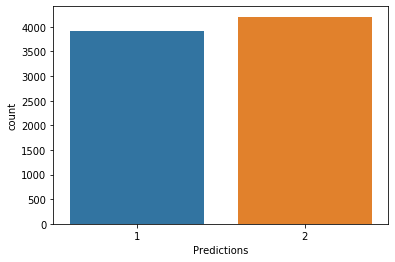

In [143]:
ax = sns.countplot(x=df1["Predictions"], data=df1)

In [139]:
df1["Predictions"].value_counts()

2    4206
1    3918
Name: Predictions, dtype: int64

In [144]:
fig = ax.get_figure()
